In [1]:
import filemapper as fm
from astropy.io import fits
import numpy as np
import scipy as sp
import astropy as ap
import timing
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convert_ra_dec_to_galactic2000(ra,dec): 
    x0 = np.cos(np.radians(dec))*np.cos(np.radians(ra))
    x1 = np.cos(np.radians(dec))*np.sin(np.radians(ra))
    x2 = np.sin(np.radians(dec))

    R = np.matrix([[-0.054876,-0.873437,-0.483835],[0.494109,-0.444830,0.746982],[-0.867666,-0.198076,0.455984]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(R,x)

    l = float(np.degrees(np.arctan2(xp[1],xp[0])) ) + 360
    b = float(np.degrees(np.arcsin(xp[2])))

    return l,b

In [3]:
spur_files = fm.load('spurs')

In [4]:
spur_files

('2458225.12644_-99.1068578863_-18.2199964696.fits',
 '2458225.11691_-86.8112323128_-13.9822522199.fits',
 '2458224.96601_-109.604228605_-31.0884932856.fits',
 '2458225.12302_-88.0375166735_-7.83346510582.fits',
 '2458224.96626_-108.122284864_-29.5510479987.fits',
 '2458224.95983_-88.0375166735_-7.83346510582.fits',
 '2458224.95358_-93.7042476064_-21.4101937591.fits',
 '2458224.9621_-101.440105198_-25.0043268035.fits',
 '2458224.96429_-91.4150963922_-9.73583210524.fits',
 '2458225.12818_-91.7360459899_-6.20781426514.fits',
 '2458224.95064_-85.8324829253_-12.2240245093.fits',
 '2458224.95737_-98.7703916431_-25.008871343.fits',
 '2458224.96259_-98.9892063342_-21.6969188578.fits',
 '2458225.11946_-89.4651888442_-14.4990382686.fits',
 '2458224.94629_-87.0342387013_-18.5393424964.fits',
 '2458225.12668_-97.9743285788_-16.5371714911.fits',
 '2458225.12251_-89.9965302119_-11.3363008344.fits',
 '2458225.14714_-86.508744285_-9.24205971071.fits',
 '2458224.95312_-95.996617308_-24.8097016185.fits

In [5]:
spurFIT = fits.open('spurs/'+ spur_files[0])

In [6]:
spurFIT.info()

Filename: spurs/2458225.12644_-99.1068578863_-18.2199964696.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  2                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  3                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  4                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  5                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  6                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  7                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  8                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
  9                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   
 10                1 BinTableHDU     19   8192R x 4C   [D, D, D, D]   


In [7]:
spur0 = spurFIT[0]

In [8]:
sprHDR = spur0.header

In [9]:
sprHDR

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NSPEC   =                   10 / Number of spectra recorded                     
BOFFILE = 'spec_ds8_8192.bof'  / FPGA binary code                               
MODE    = 'spec    '           / Spectrometer mode                              
FPGA    =          192000000.0 / FPGA clock speed (Hz)                          
IADC    =          768000000.0 / iADC clock speed (Hz)                          
DOWNSAMP=                    8 / ADC downsampling period.                       
SAMPRATE=           24000000.0 / Downsampled clock speed (Hz)                   
BW      =           12000000.0 / Bandwidth of spectra (Hz)                      
NCHAN   =                 81

In [10]:
1523890938.335371 - timing.unix_time(2458225.12743)

-71.61661839485168

     not the same time as the one in the fits file ^^^^

In [11]:
print(spur0.header['DEC'], spur0.header['RA'])

(-18.219996469587, -99.10685788632426)


    Header size is not multiple of 2880: 5619
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


IOError: Empty or corrupt FITS file

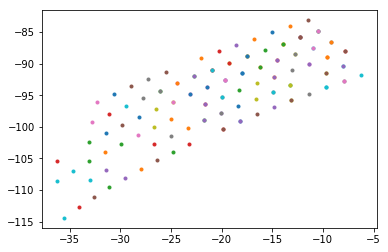

In [12]:
for file in spur_files:
    spurDAT = fits.open('spurs/'+file,ignore_missing_end=True)
    spurINFO = spurDAT[0]
    spurHEAD = spurINFO.header
    spurRA = spurHEAD['RA']
    spurDEC = spurHEAD['DEC']
    plt.plot(spurDEC,spurRA,'.')

In [13]:
spurFIT[1].data['auto0_real']

array([0.        , 0.        , 0.01068689, ..., 0.        , 0.        ,
       0.        ])

IOError: Empty or corrupt FITS file

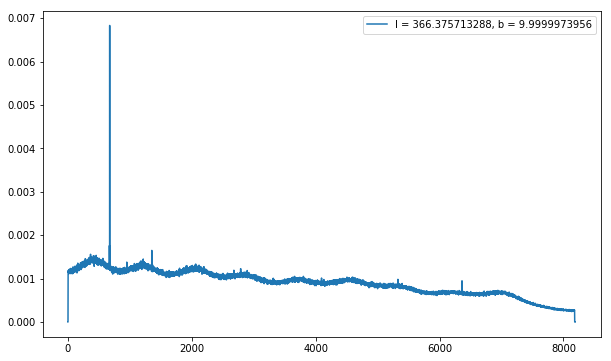

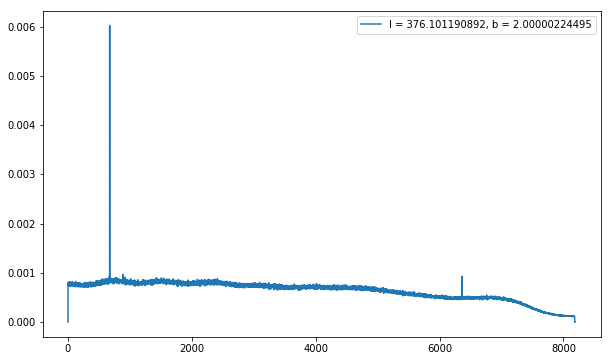

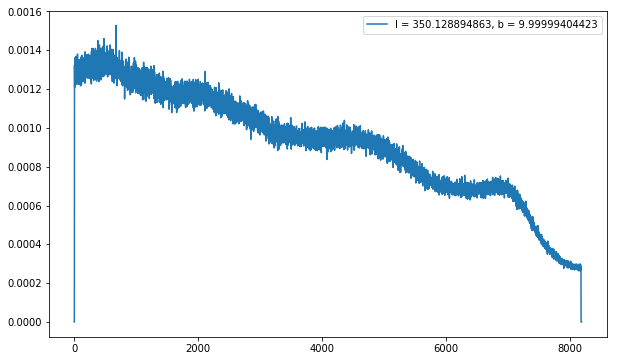

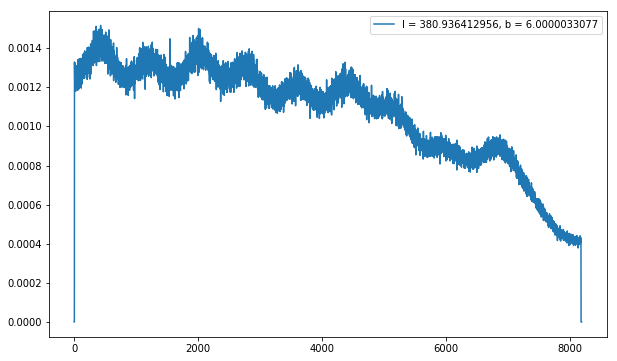

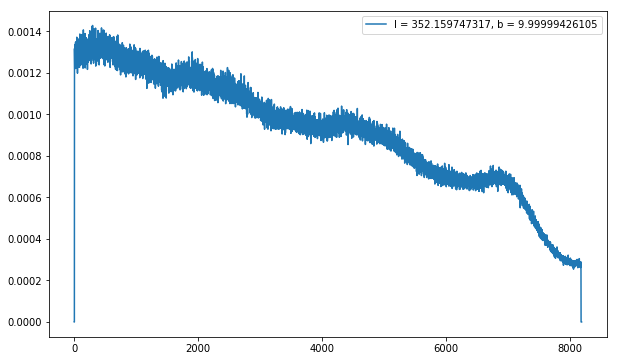

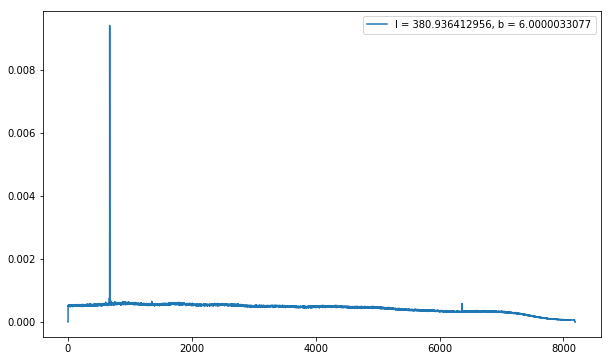

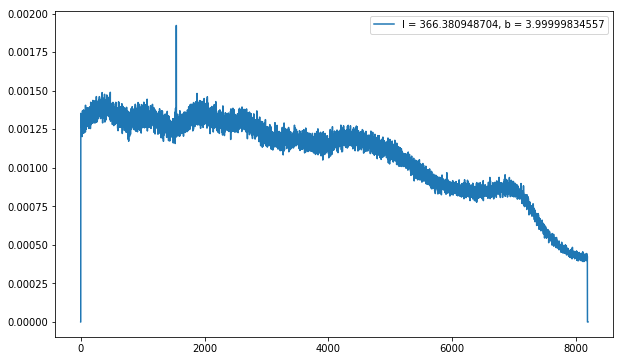

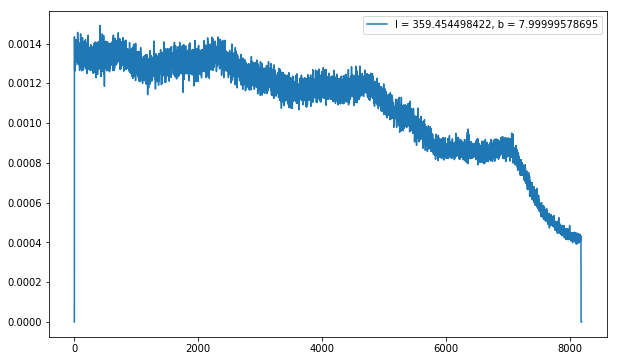

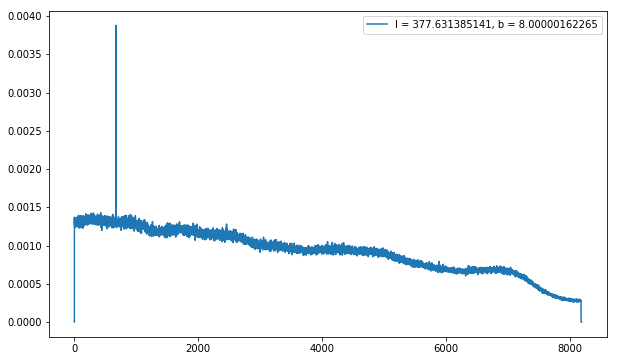

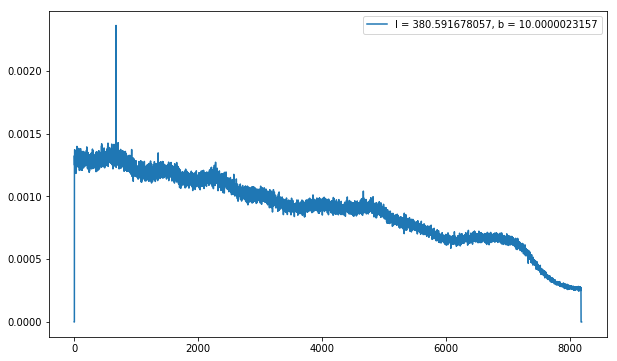

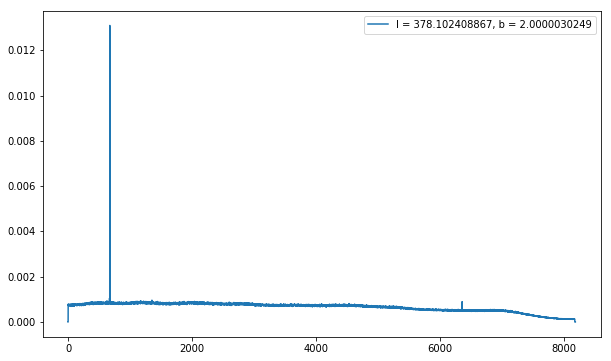

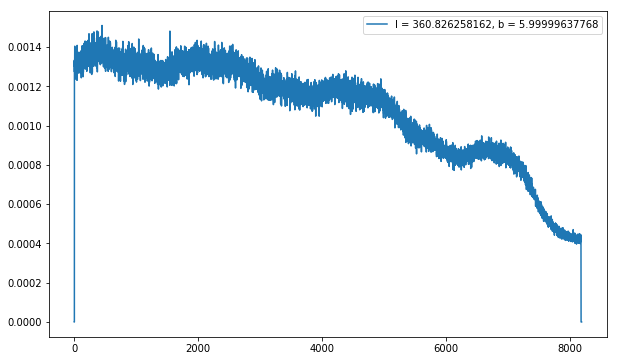

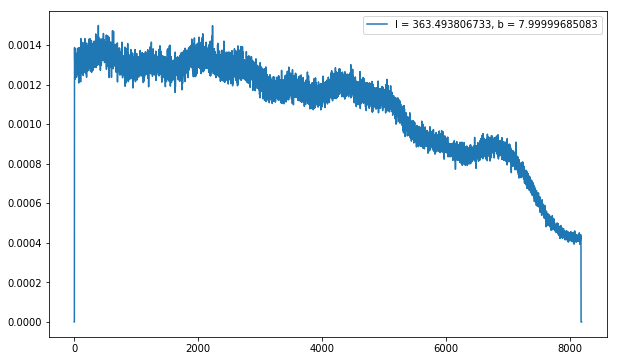

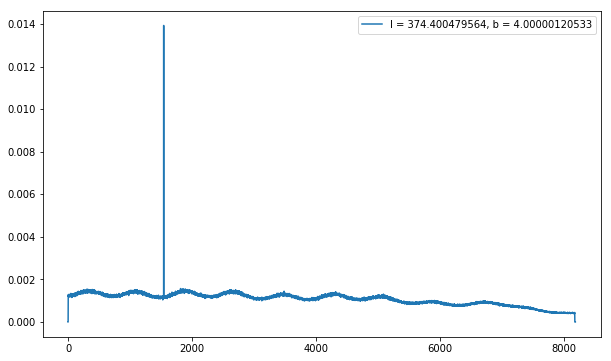

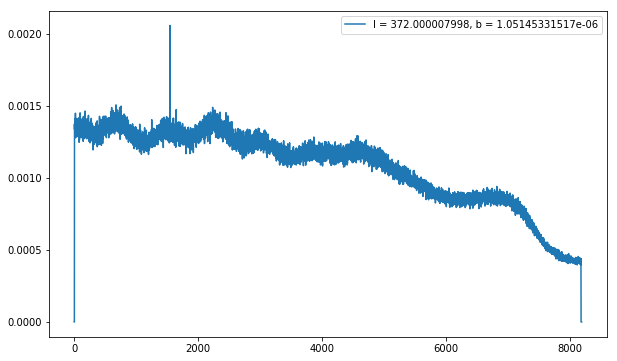

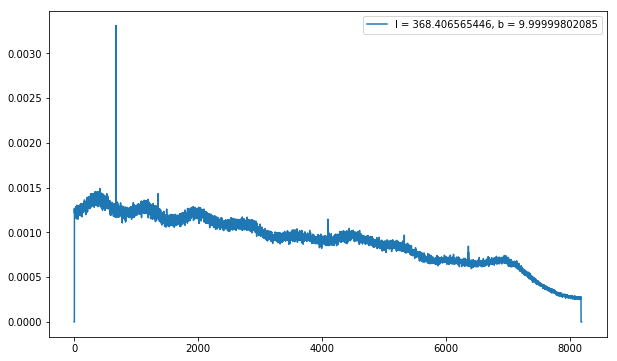

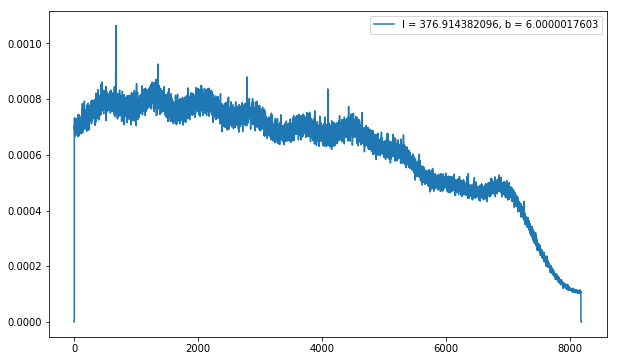

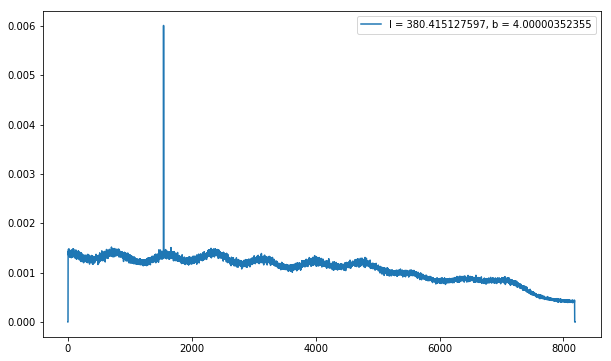

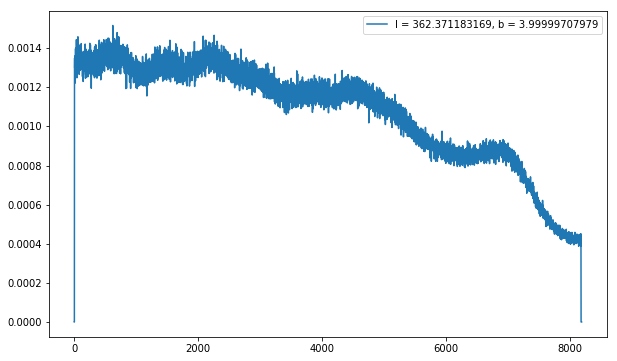

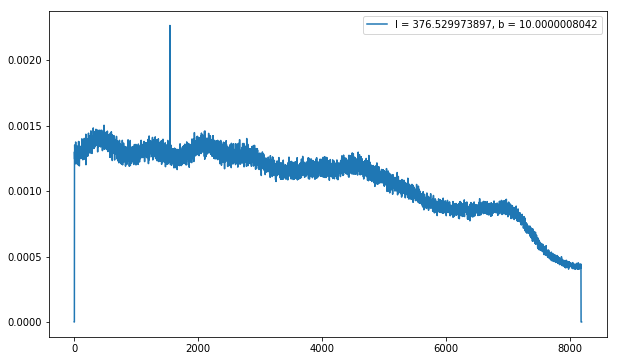

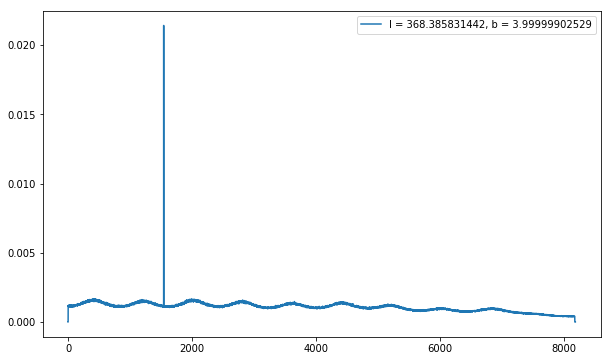

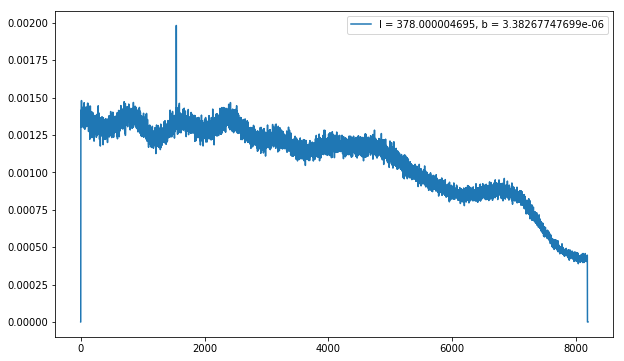

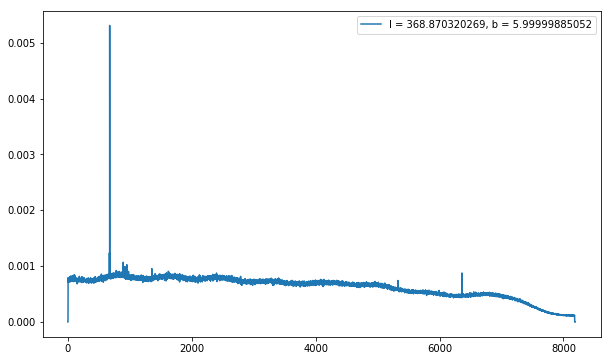

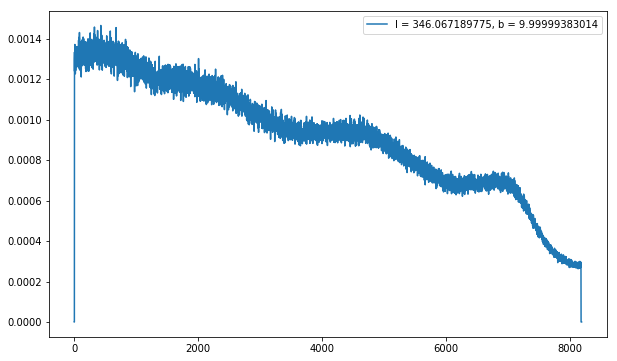

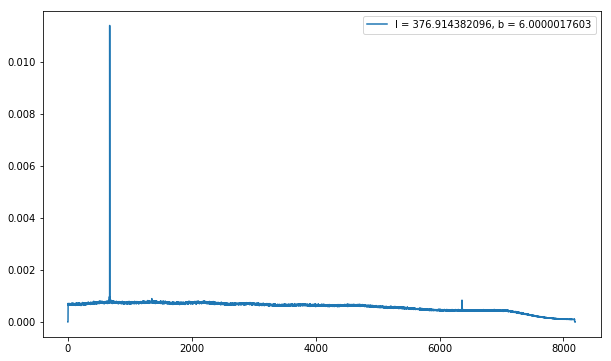

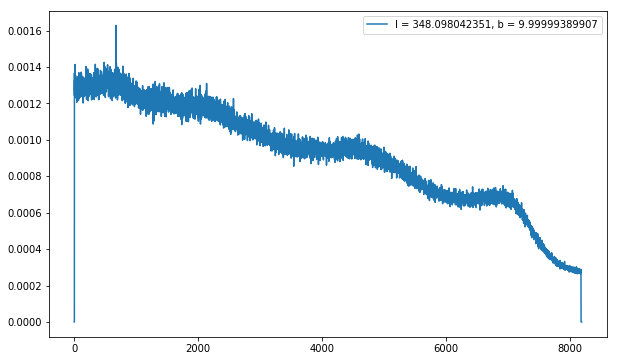

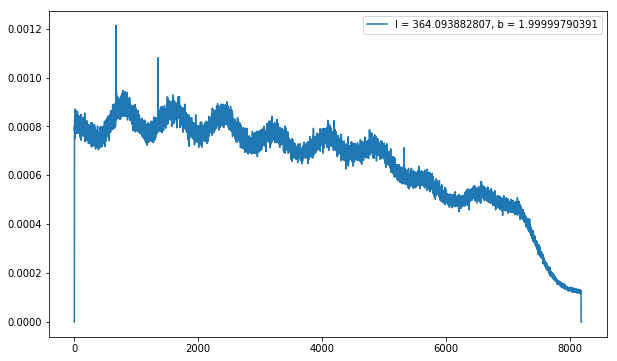

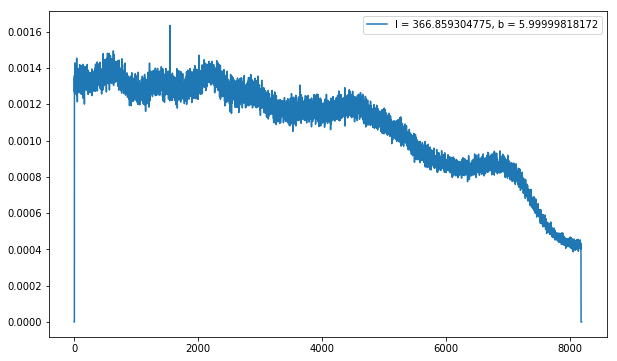

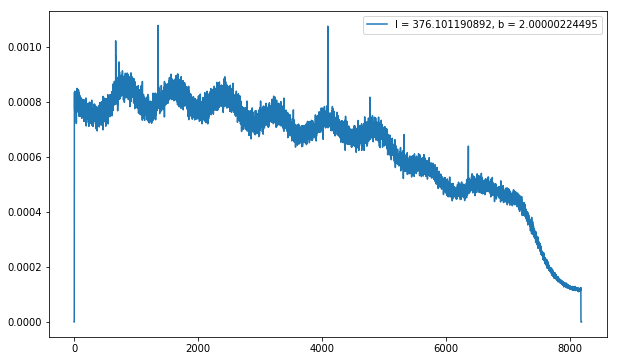

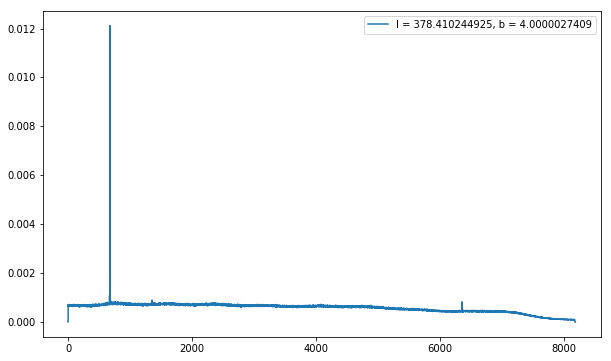

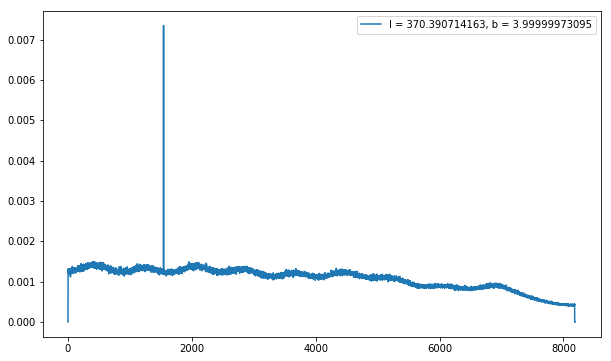

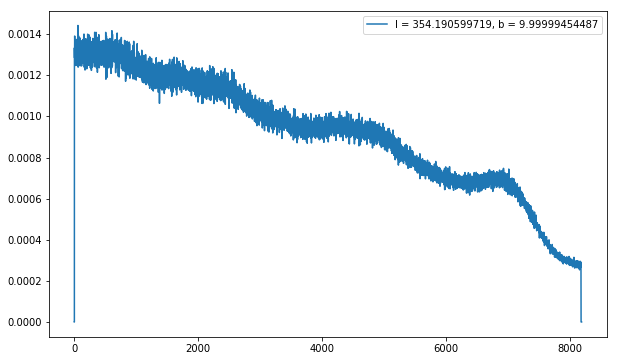

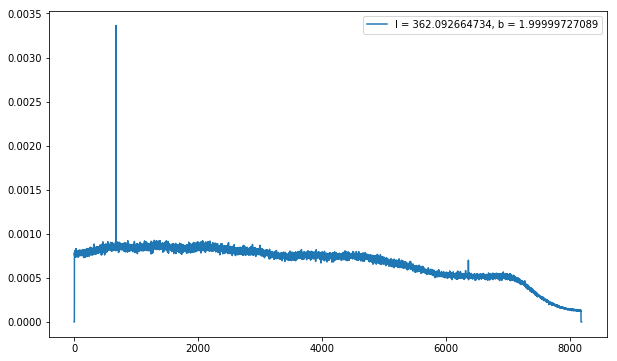

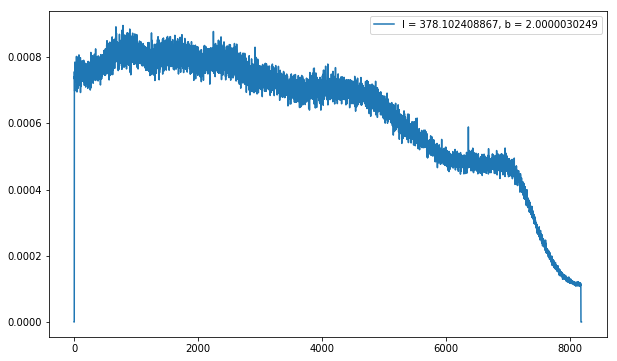

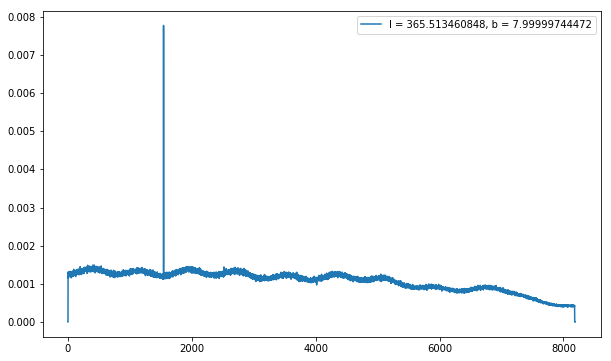

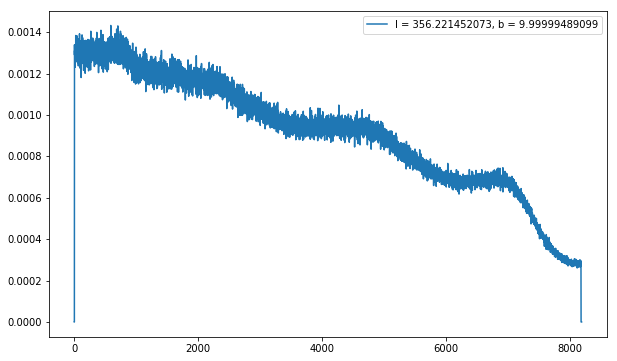

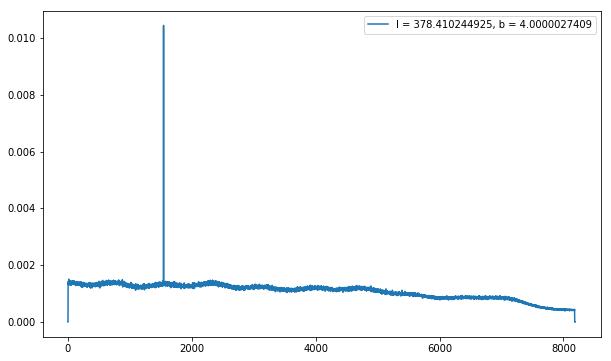

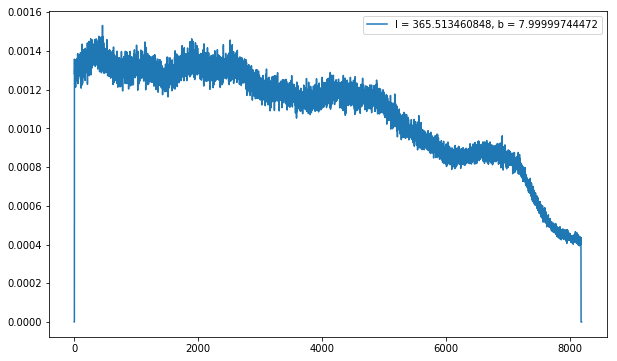

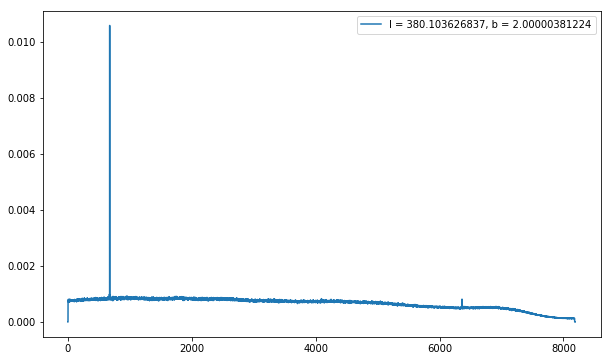

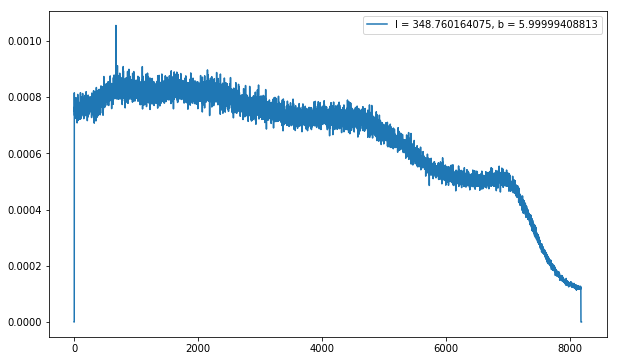

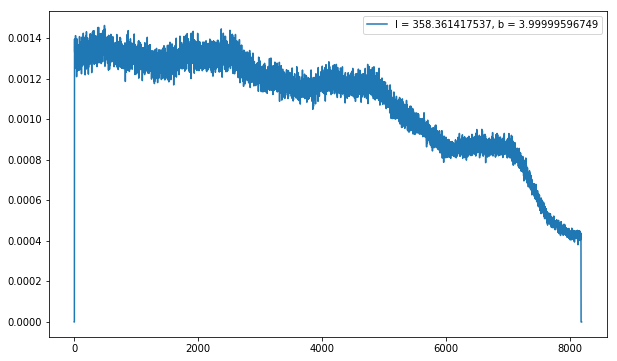

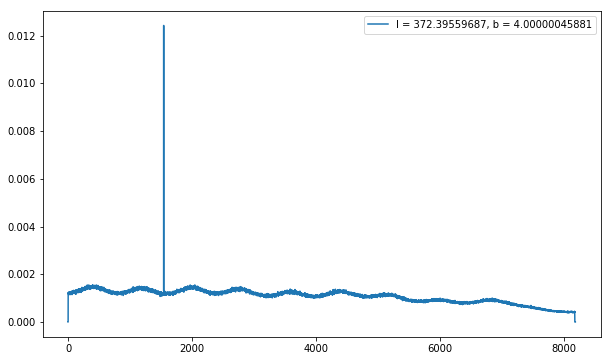

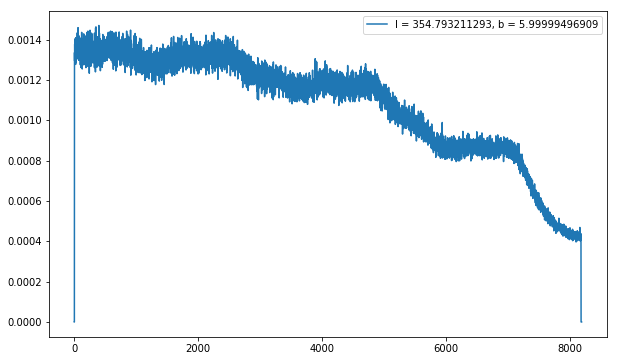

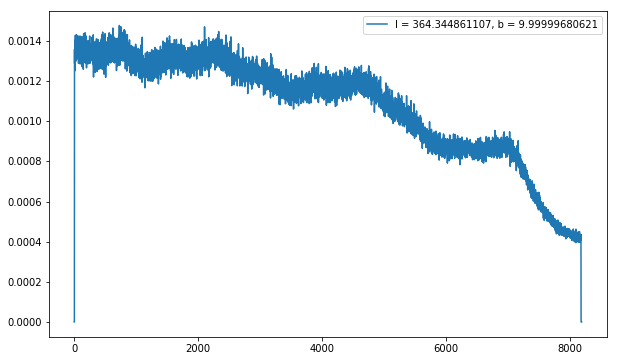

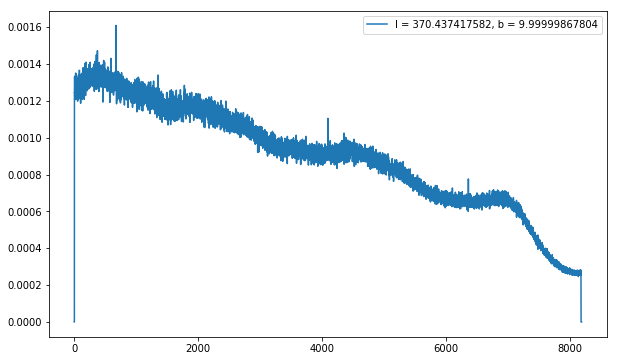

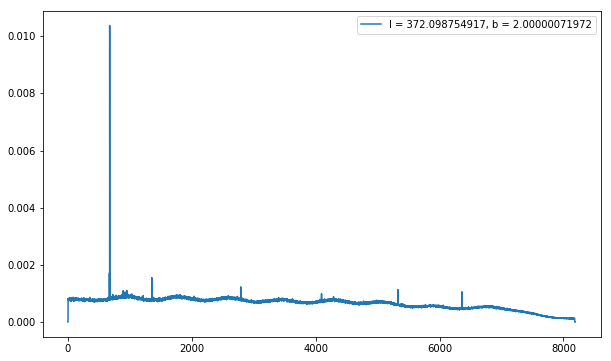

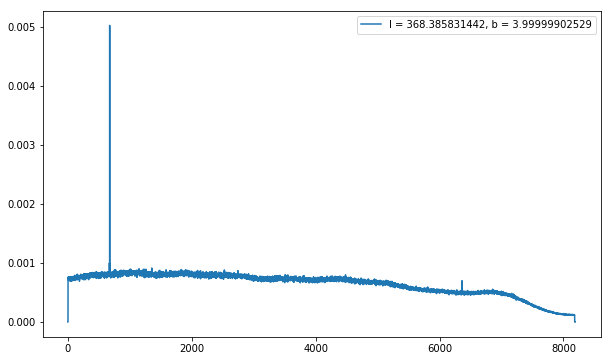

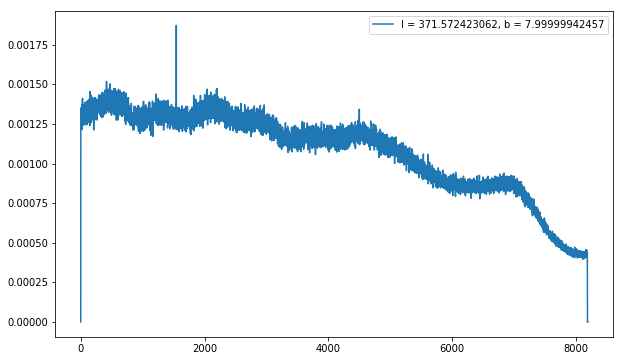

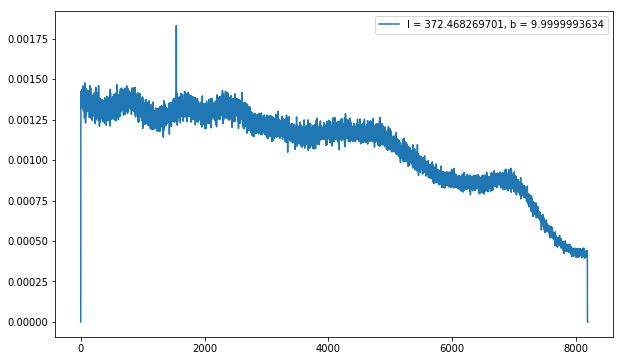

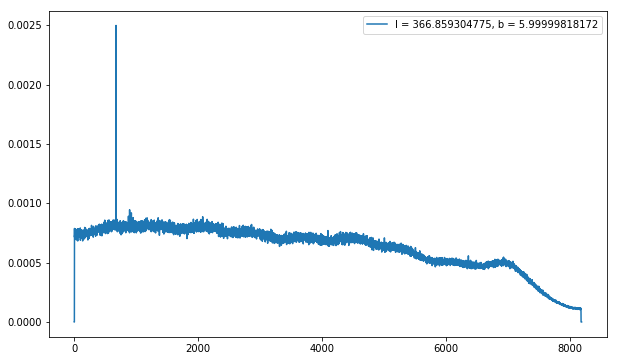

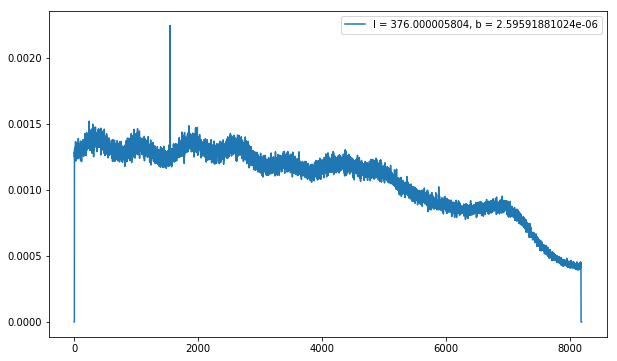

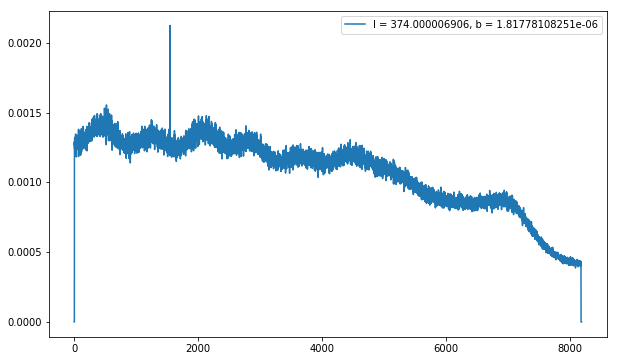

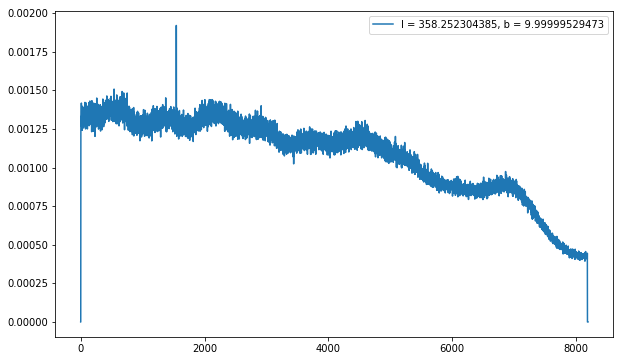

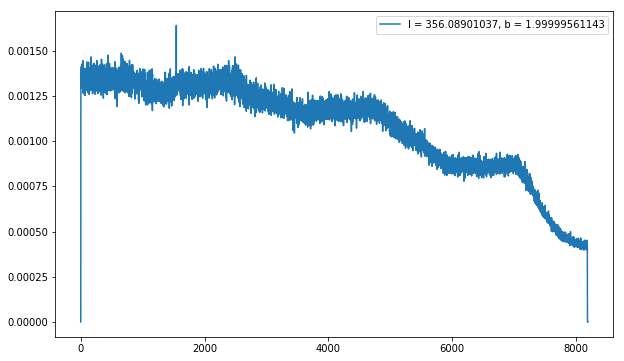

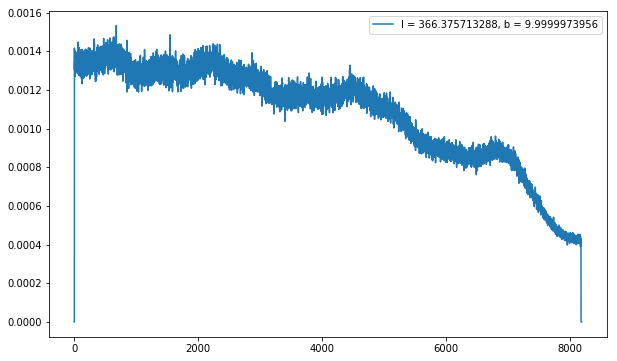

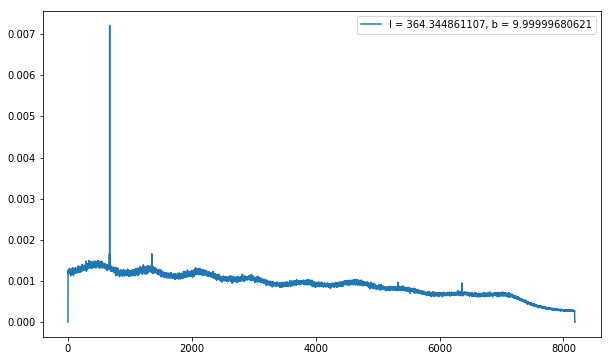

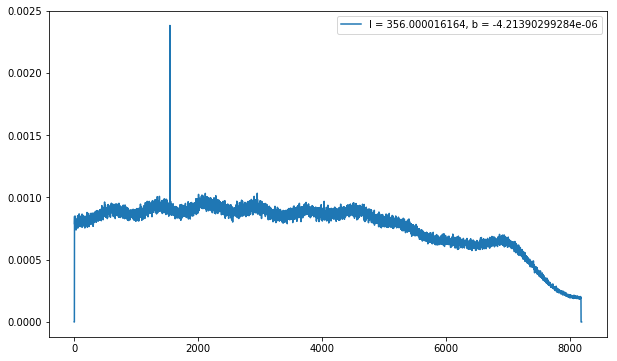

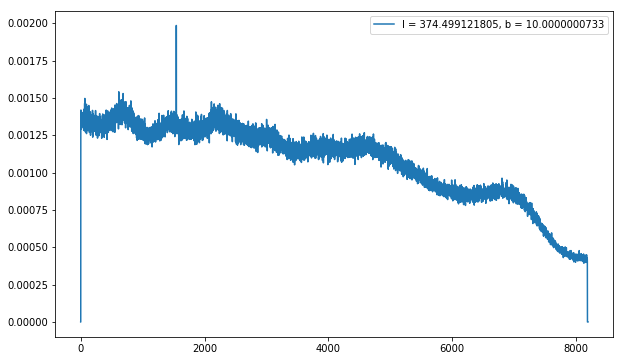

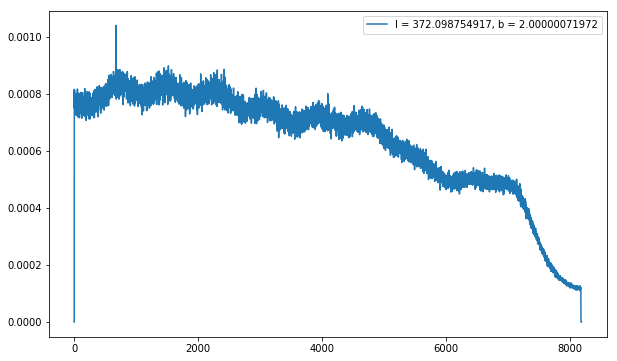

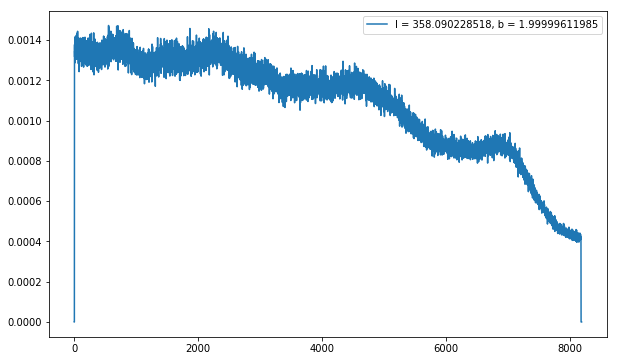

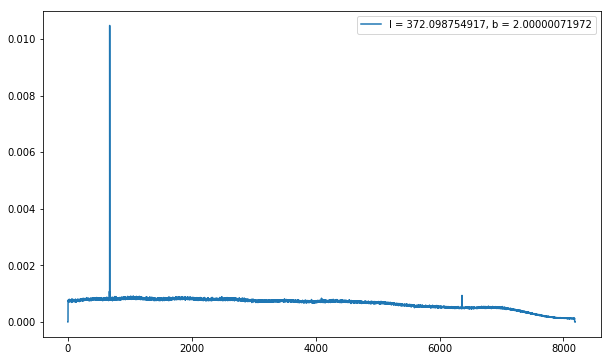

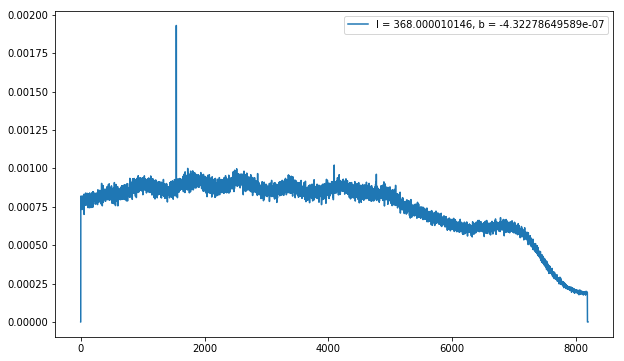

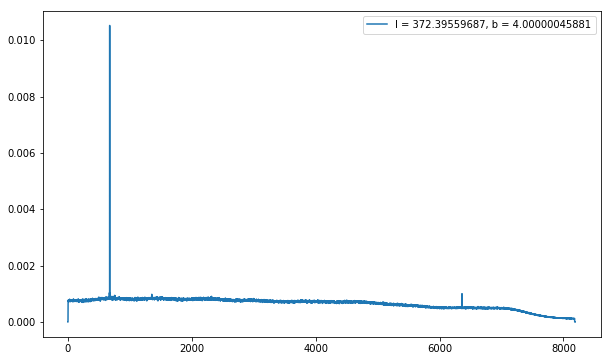

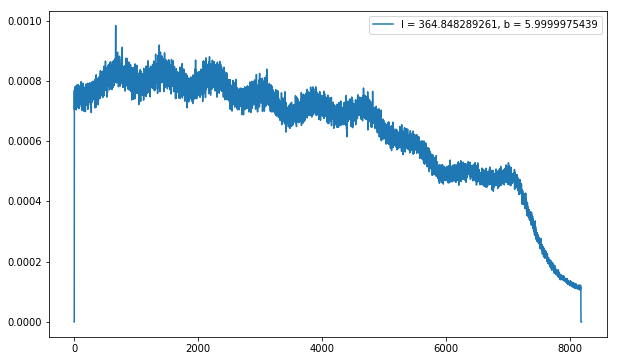

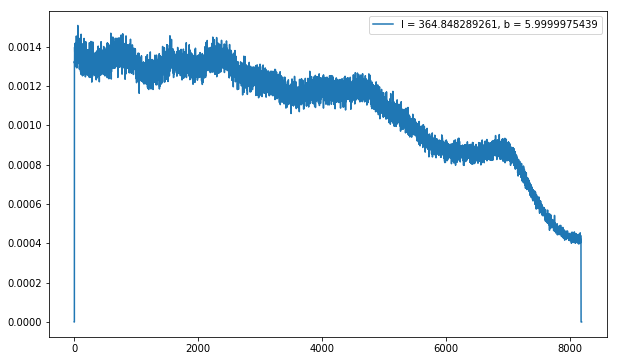

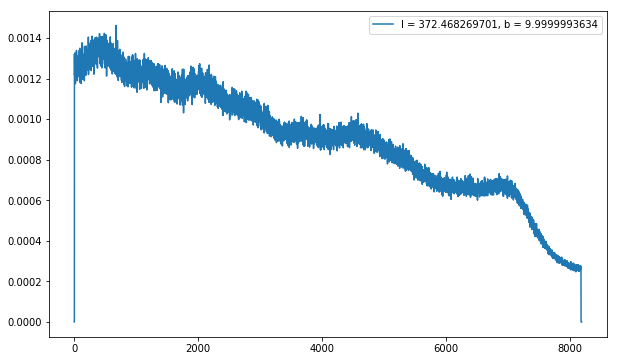

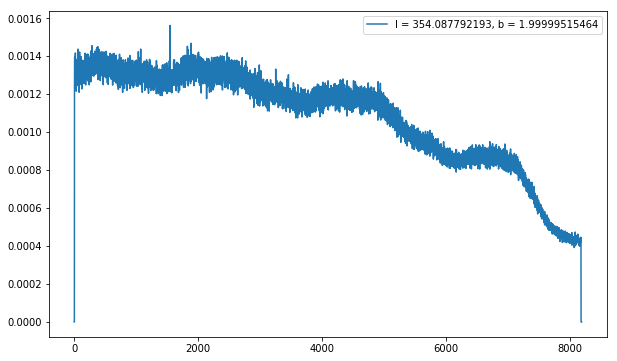

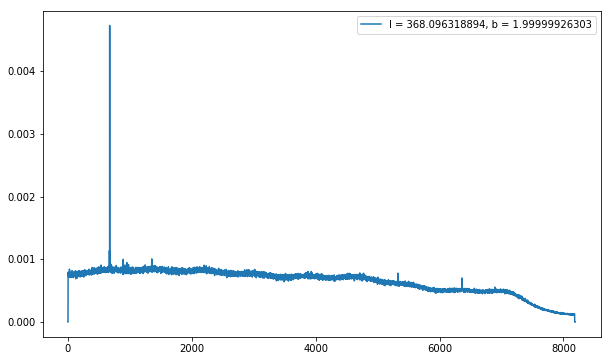

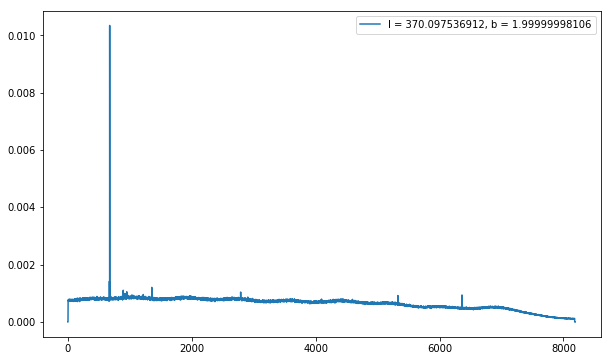

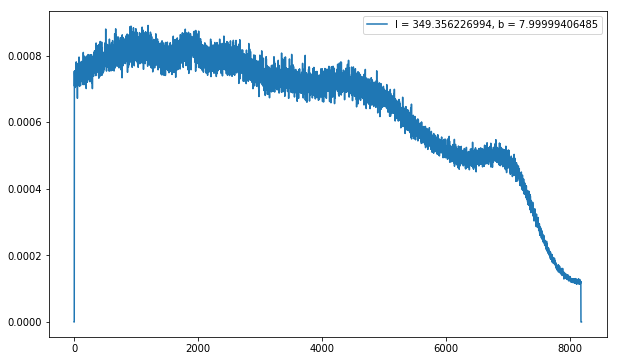

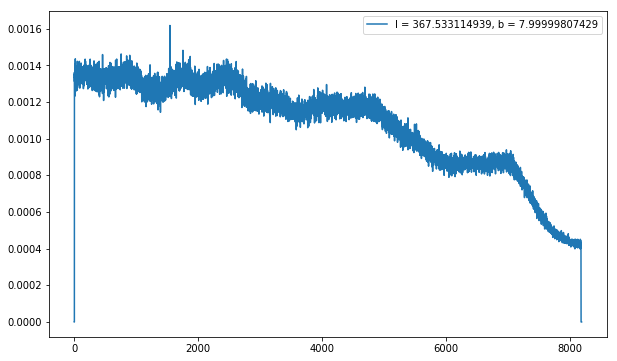

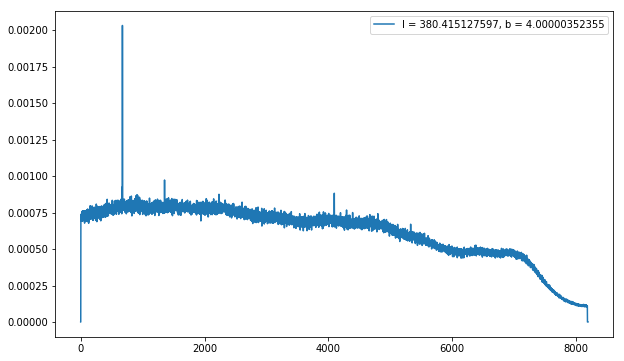

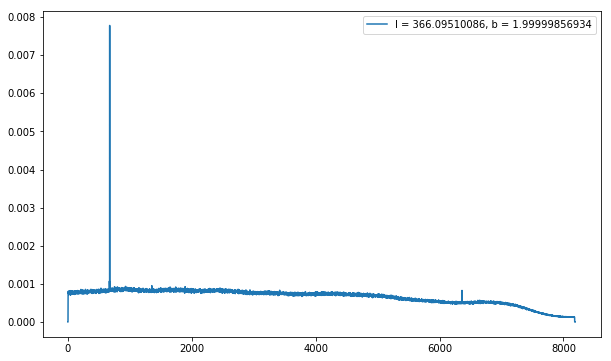

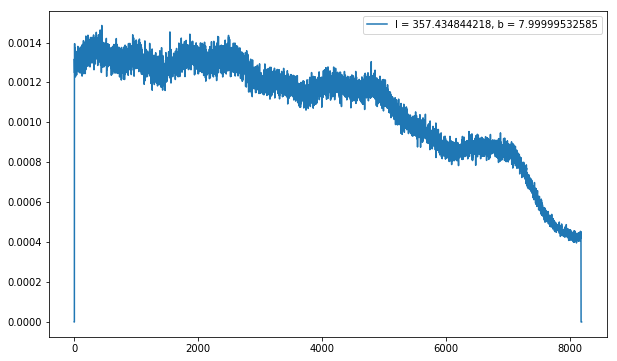

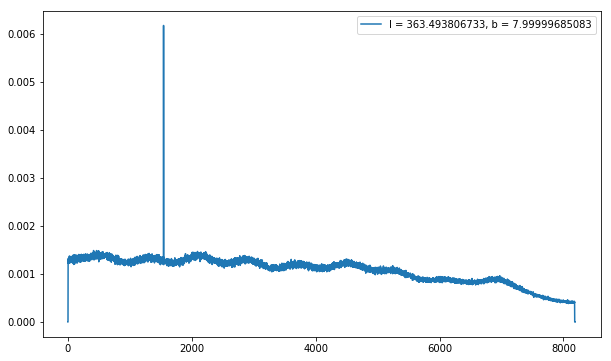

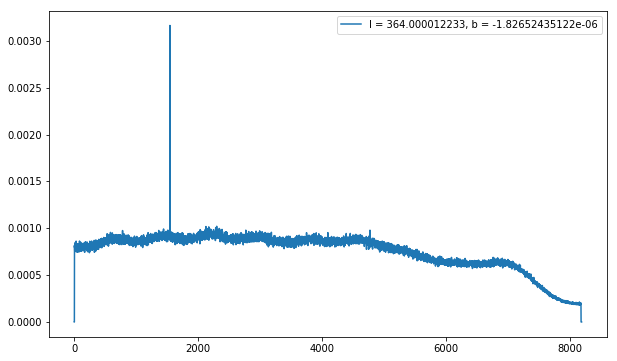

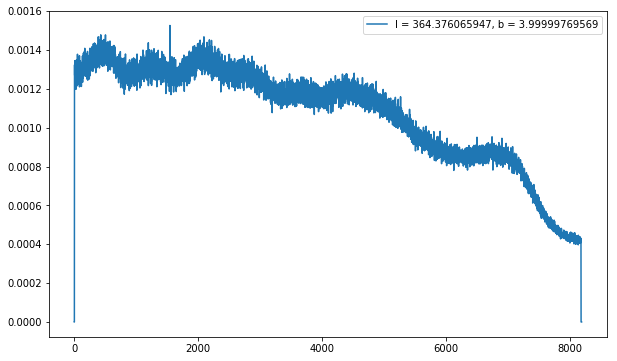

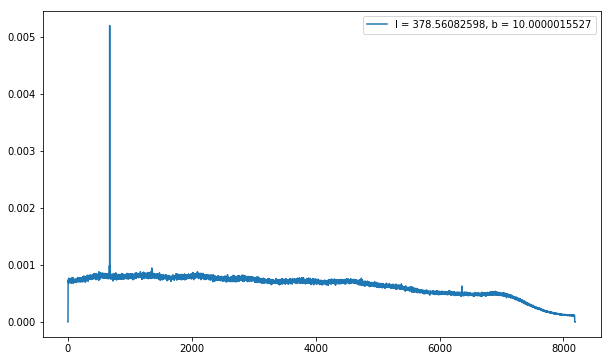

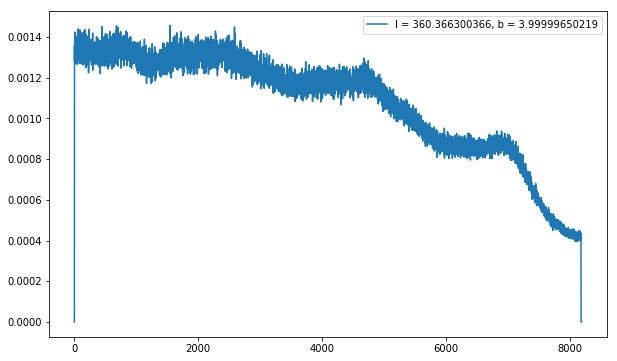

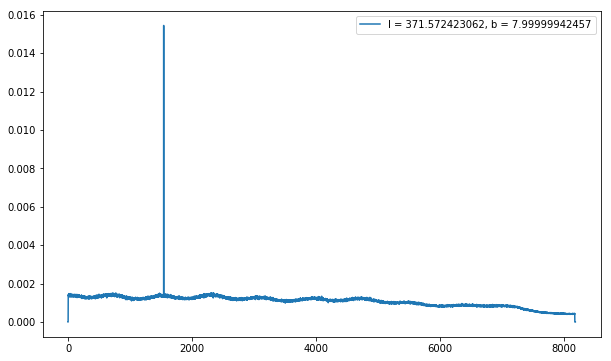

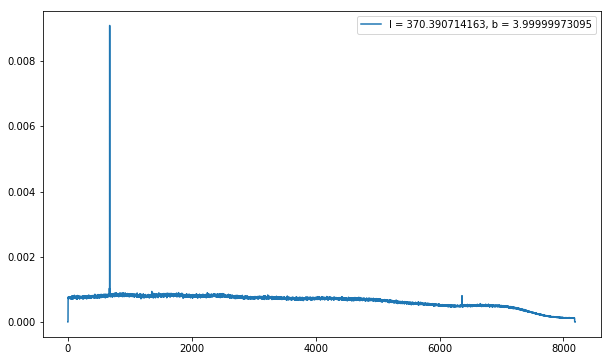

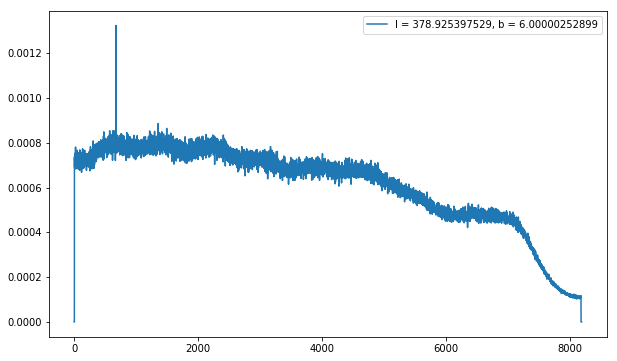

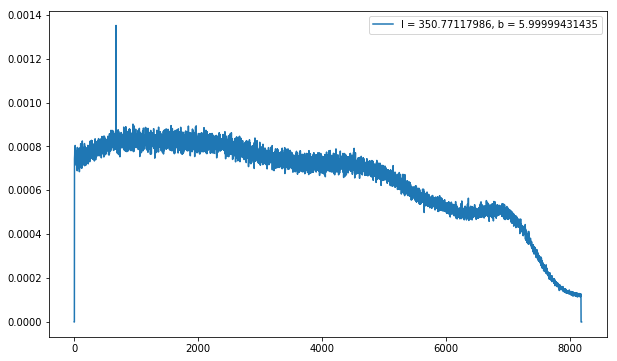

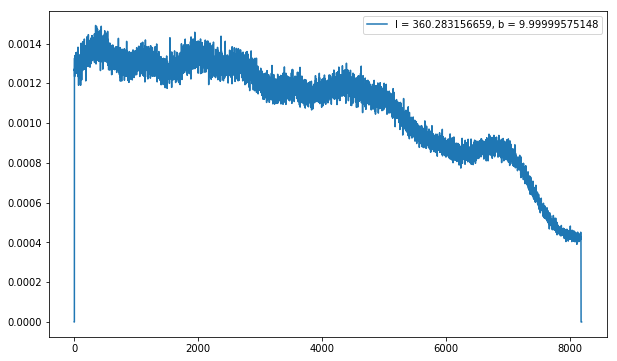

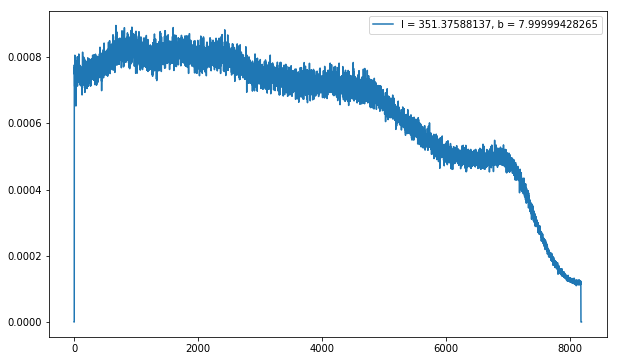

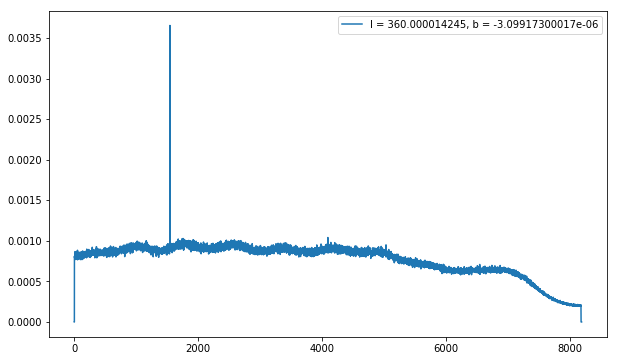

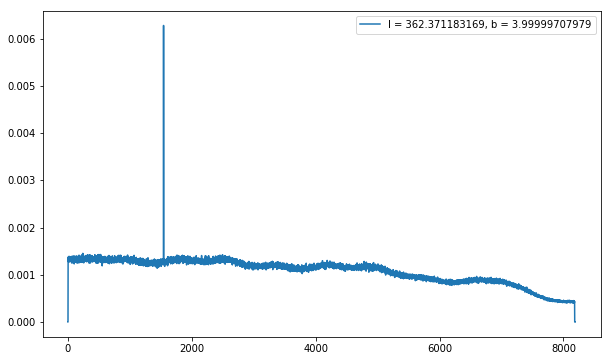

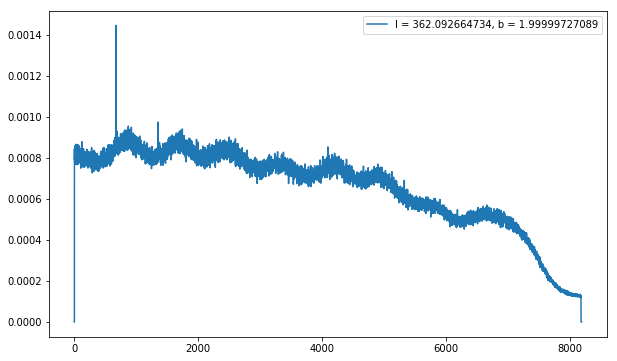

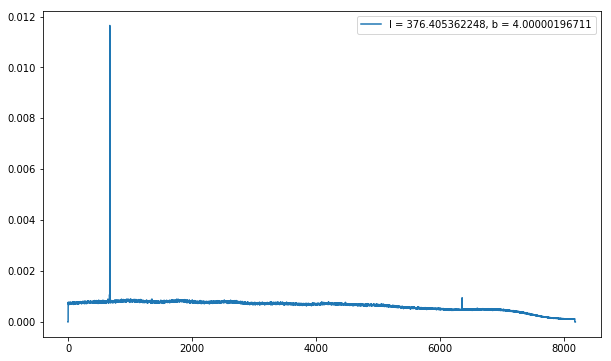

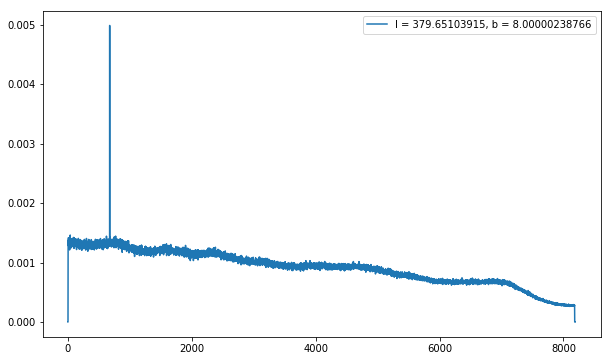

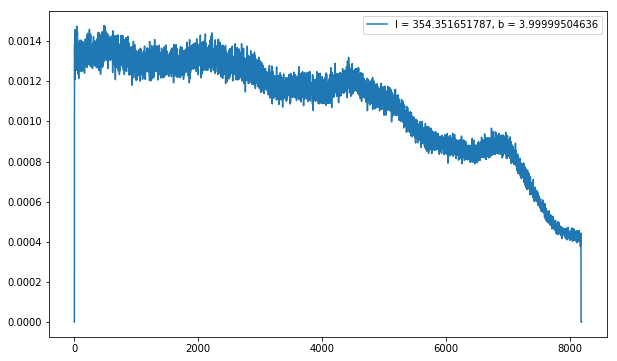

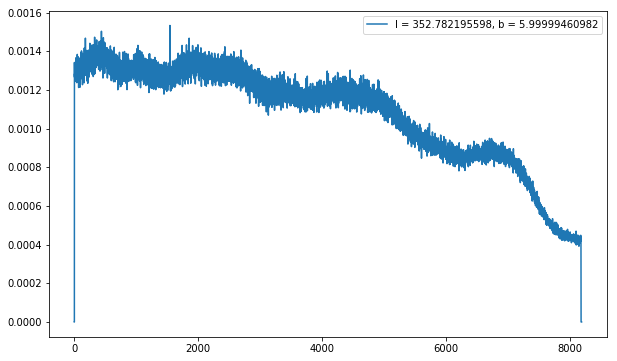

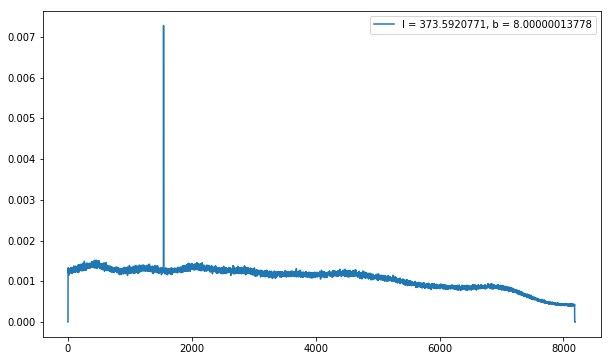

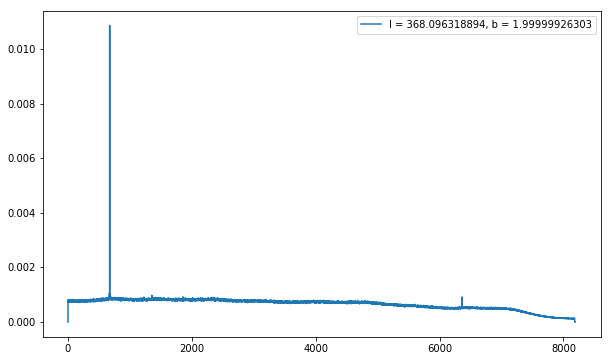

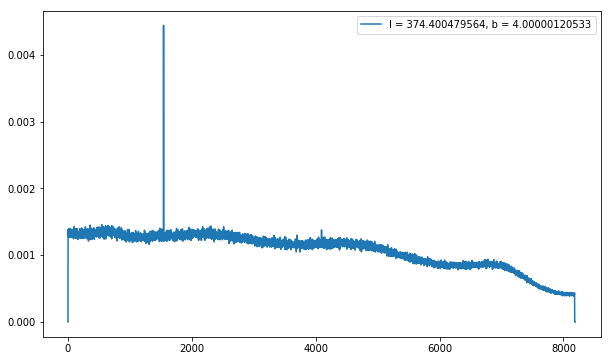

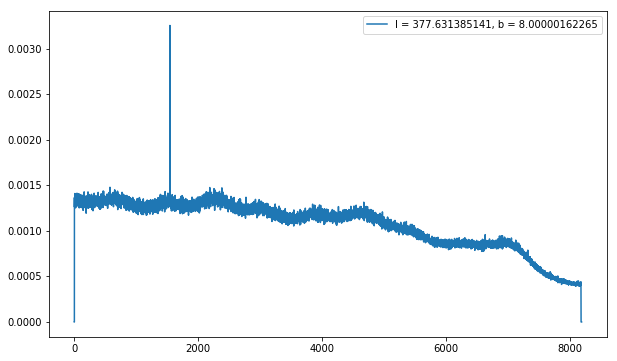

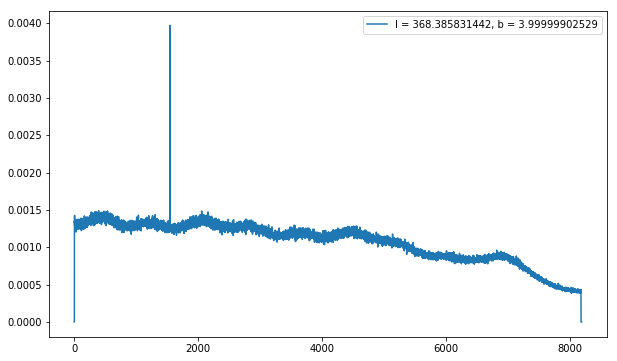

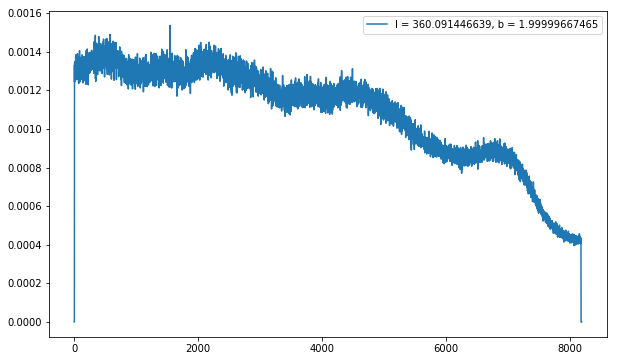

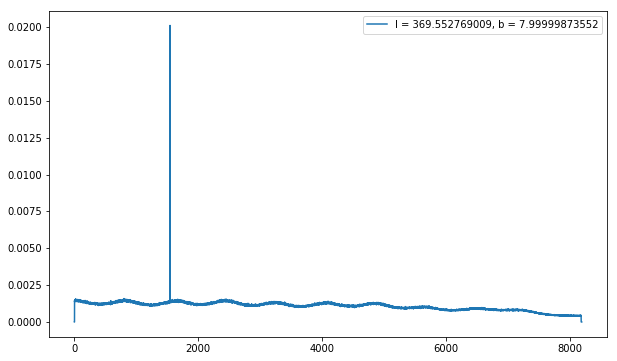

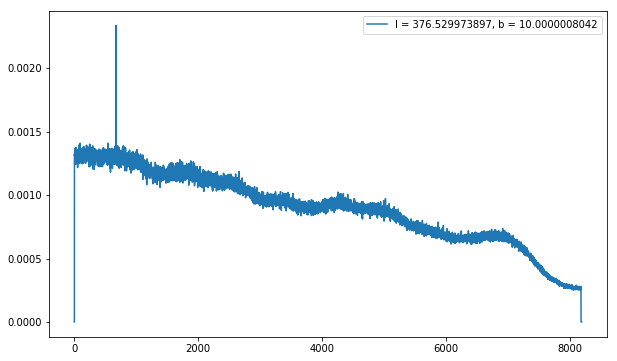

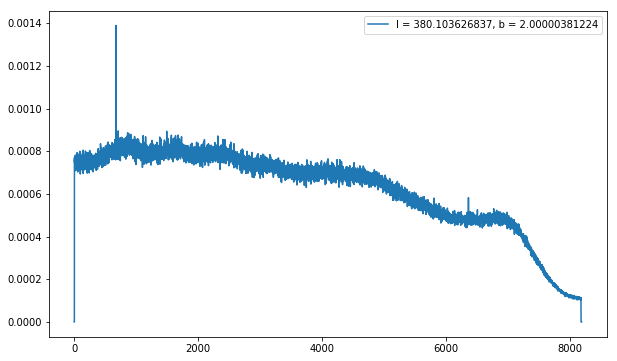

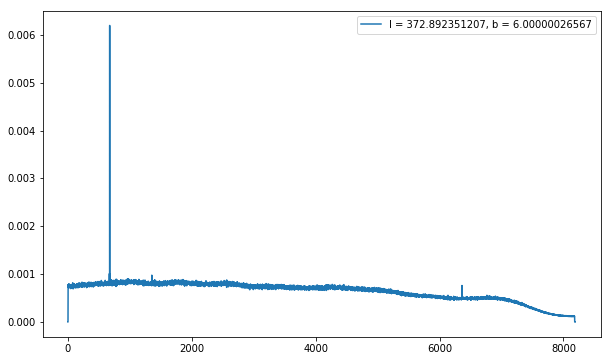

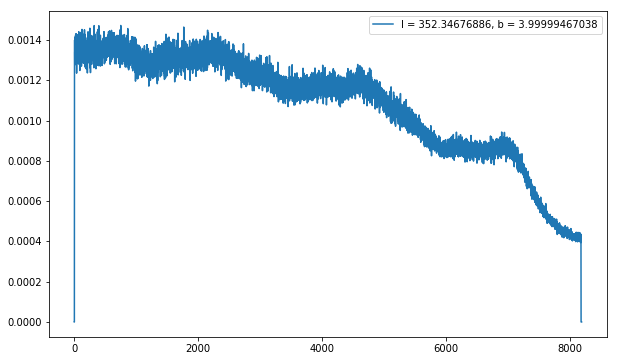

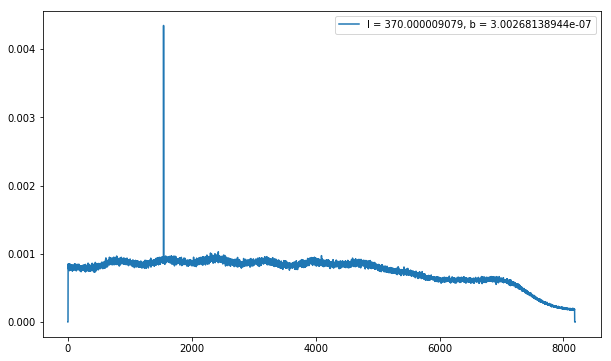

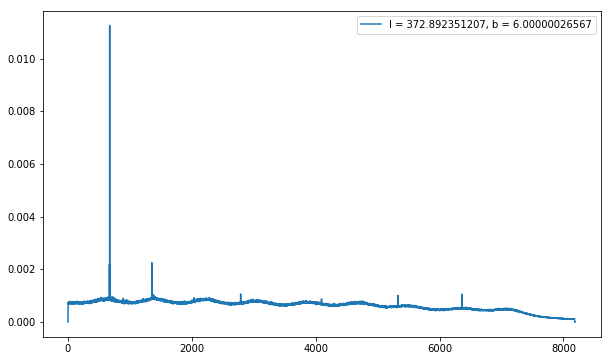

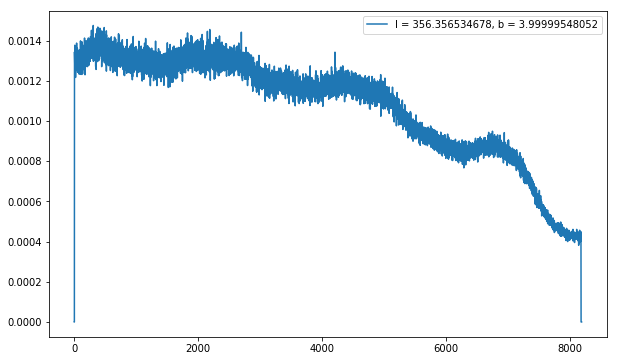

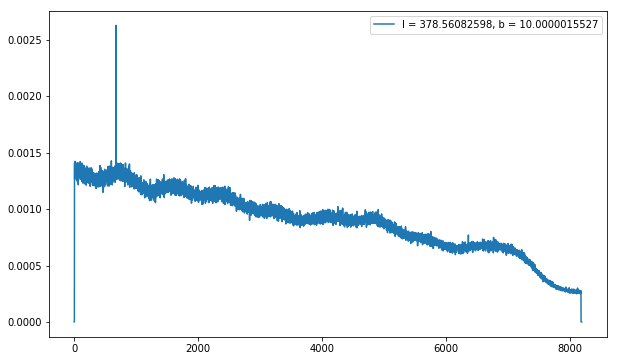

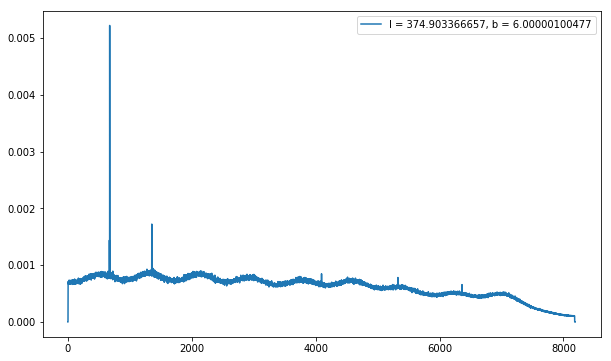

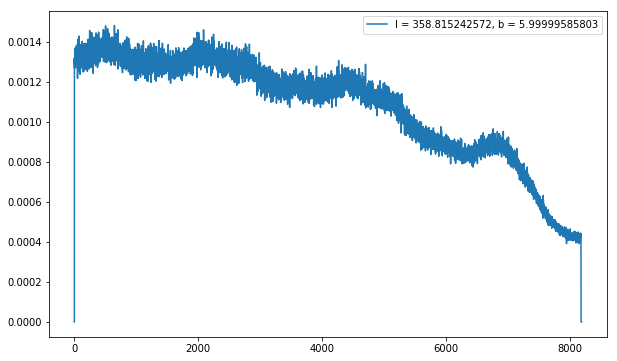

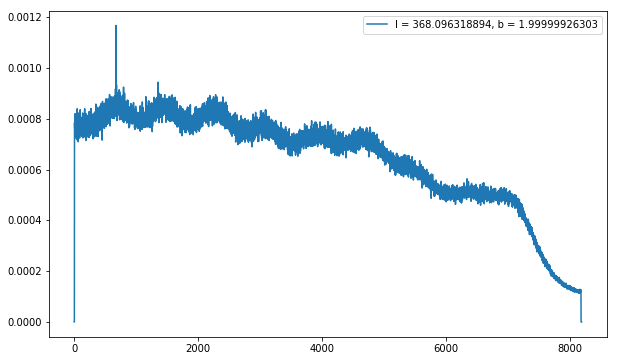

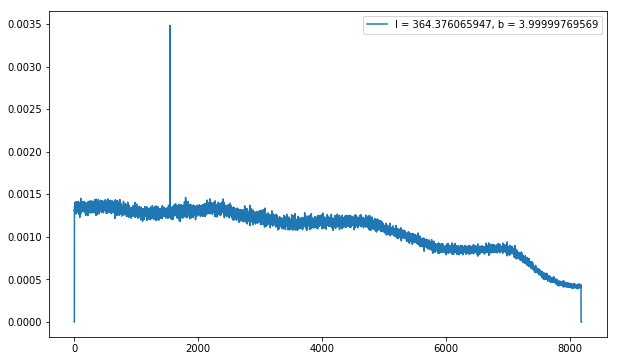

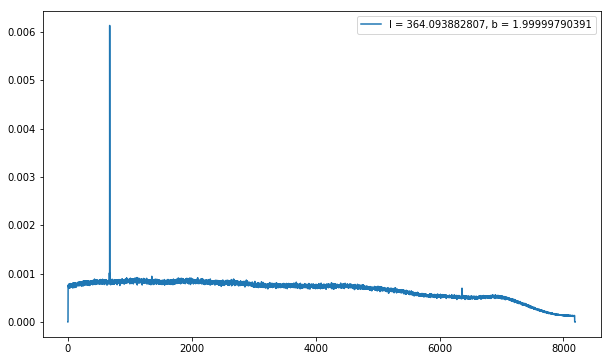

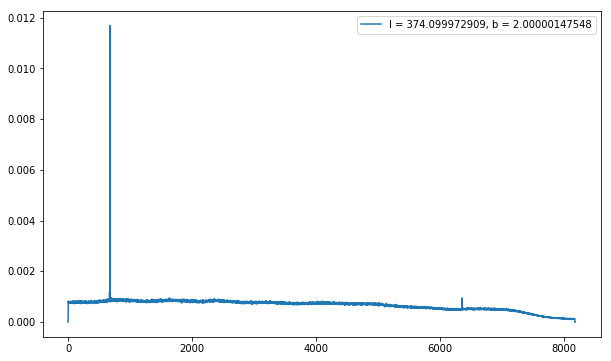

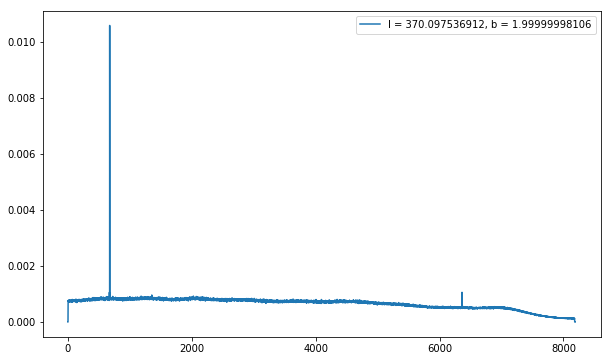

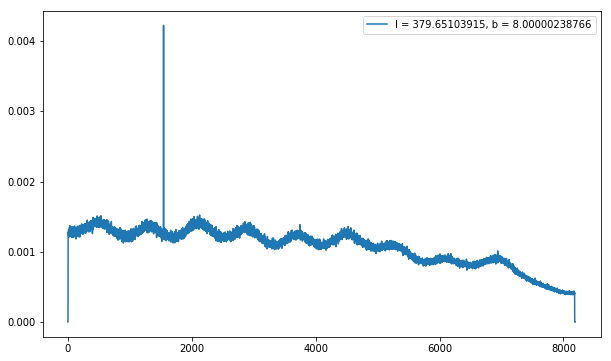

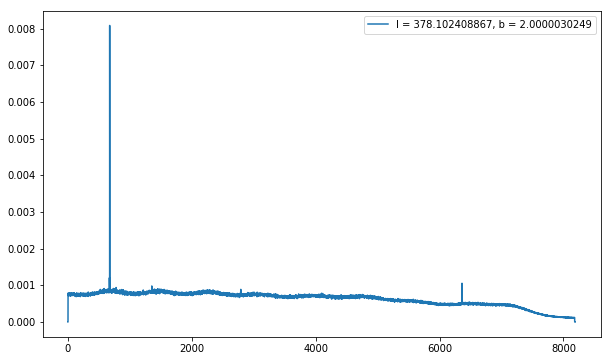

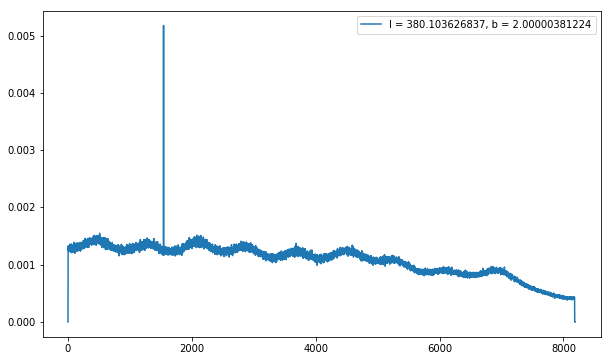

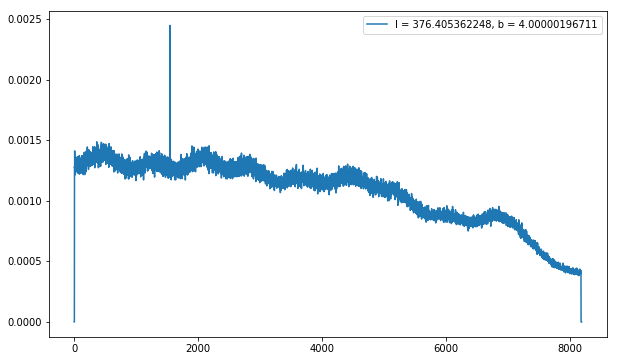

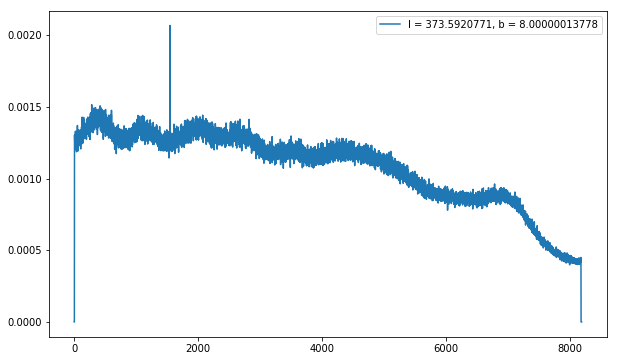

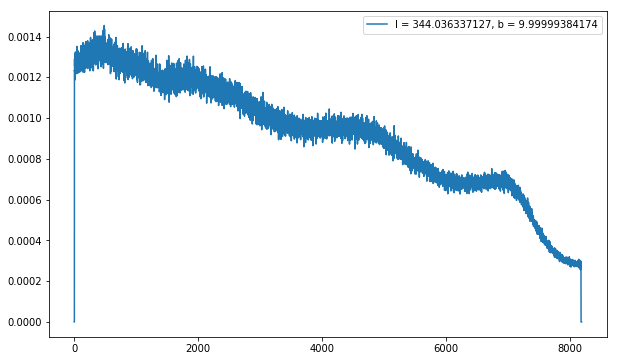

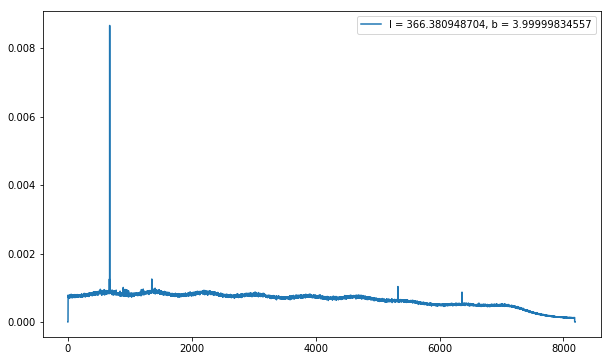

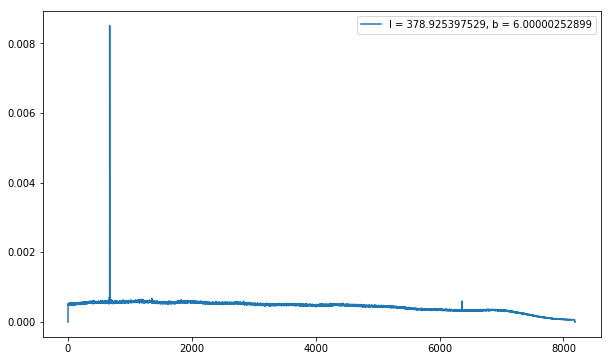

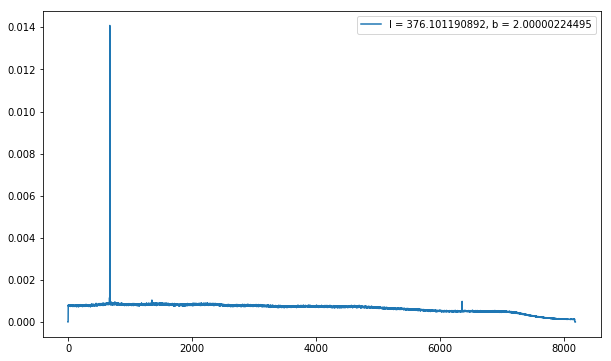

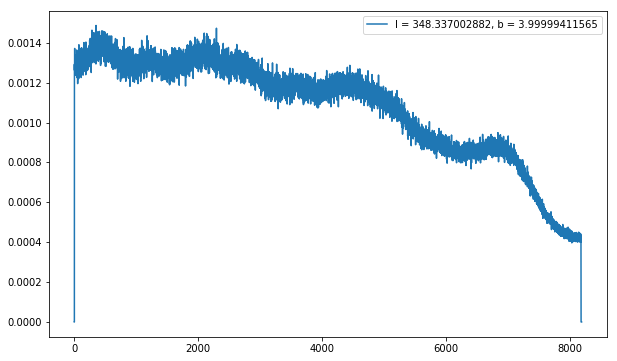

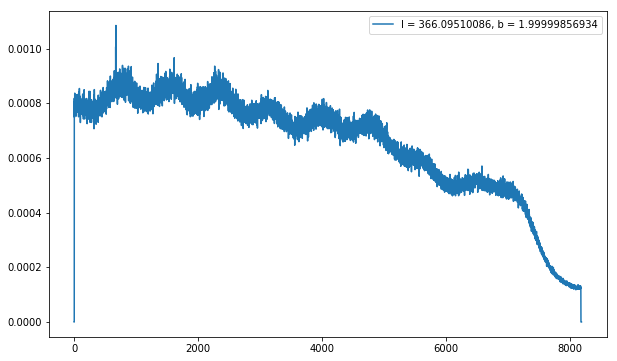

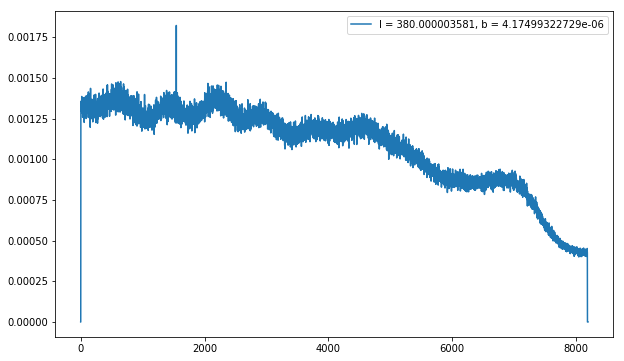

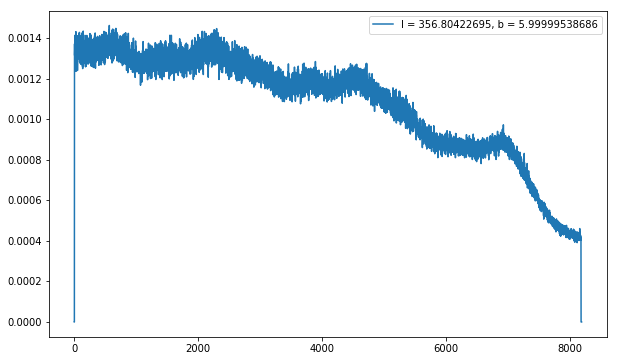

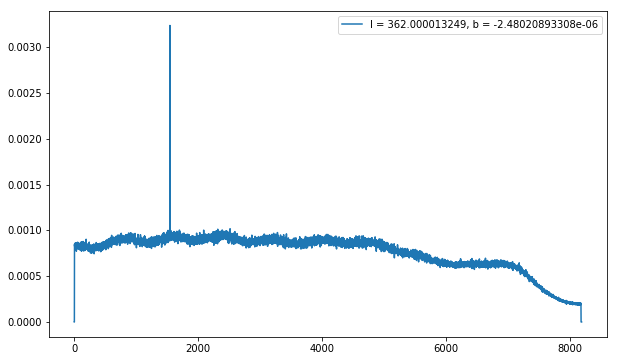

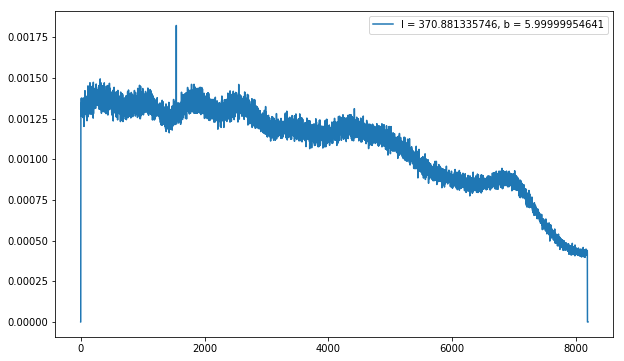

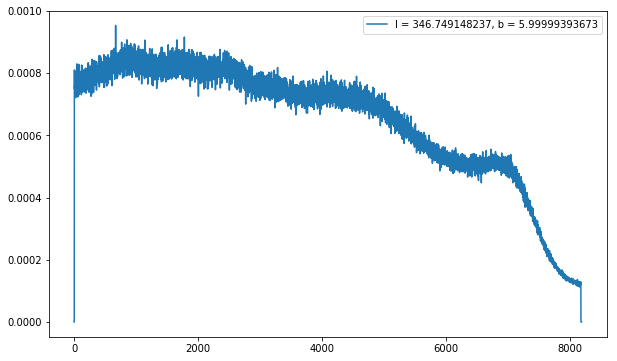

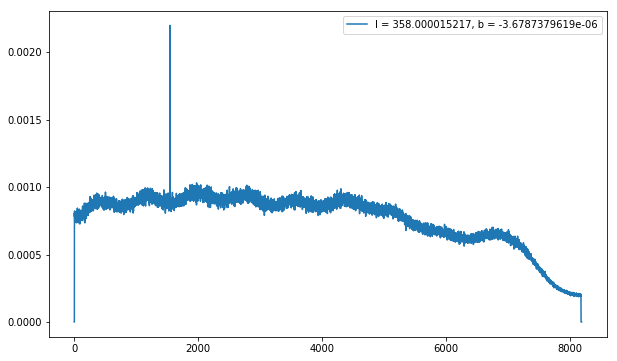

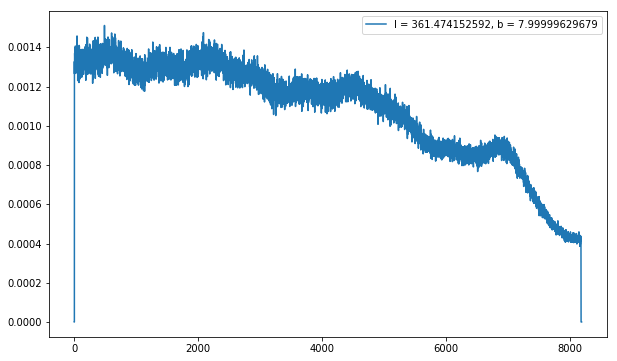

In [15]:
for file in spur_files:
    spurDAT = fits.open('spurs/'+file,ignore_missing_end=True)
    spurINFO = spurDAT[0]
    spurHEAD = spurINFO.header
    spurSUM = np.zeros(8192)
    
    for i in np.arange(1,11):
        spurSUM += spurDAT[i].data['auto0_real']
        spurSUM = spurSUM/10.
        spurRA = spurHEAD['RA']
        spurDEC = spurHEAD['DEC']
        spurl,spurb = convert_ra_dec_to_galactic2000(spurRA, spurDEC)
    plt.figure(figsize = (10,6))
    plt.plot(spurSUM, label = 'l = {}, b = {}'.format(spurl,spurb))
    plt.legend()

In [ ]:
spurFIT[3].data['auto0_real']

## What did we look at?

In [ ]:
coord = np.load('NPS_coord_ra_dec.npz')
coord.keys()

In [ ]:
ra = coord['arr_0'][:100]
dec = coord['arr_1'][:100]

In [ ]:
plt.plot(ra,dec, '.')